In [350]:
import pandas as pd


In [351]:
dataset=pd.read_csv("/content/model.csv")

In [352]:
dataset.head(2)

,Unnamed: 0,description,property_type,id,postal_code,price,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,listing_year,construction_year
0,0,[ 0.75826776 3.213125 -4.9623823 -3.432942...,[ 0.94690067 1.3557965 -3.429536 -4.110108...,4388064.0,17.0,139000.0,1.0,1975.5,1.0,207.0,3.0,1.0,7.0,62.0,2018.0,2018.0
1,1,[ 0.95163393 1.9673971 -4.0726137 -2.553373...,[-1.1773891 -2.0983608 -6.210434 -2.006682...,4388200.0,74.0,209000.0,1.0,1980.0,1.0,148.0,5.0,1.0,6.0,136.0,2018.0,2018.0


In [353]:
dataset.shape


(49992, 16)

In [354]:
dataset=dataset.dropna()



In [355]:
data=dataset.drop(columns=["Unnamed: 0","property_type","description","id","listing_year"])

In [356]:
data.head()

,postal_code,price,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,construction_year
0,17.0,139000.0,1.0,1975.5,1.0,207.0,3.0,1.0,7.0,62.0,2018.0
1,74.0,209000.0,1.0,1980.0,1.0,148.0,5.0,1.0,6.0,136.0,2018.0
2,10.0,267500.0,0.0,2005.5,0.0,207.0,3.0,1.0,7.0,70.0,2018.0
3,56.0,349000.0,1.0,1973.0,1.0,244.0,5.0,1.0,7.0,144.0,2018.0
4,77.0,495000.0,1.0,1900.0,0.0,4500.0,8.0,1.0,7.0,323.0,2018.0


In [357]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
d=ss.fit_transform(data)
data=pd.DataFrame(d,columns=data.columns)

dataset=data.dropna()

In [358]:
dataset.head()

,postal_code,price,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,construction_year
0,-1.170834,-0.900507,0.609214,0.036635,0.656425,-0.087914,-1.036045,-0.254684,-0.000554,-1.151205,-0.258518
1,1.157406,-0.534254,0.609214,0.153434,0.656425,-0.108226,0.225089,-0.254684,-0.928721,0.323758,-0.258518
2,-1.456758,-0.228171,-1.641460,0.815295,-1.523404,-0.087914,-1.036045,-0.254684,-0.000554,-0.991749,-0.258518
3,0.422172,0.198253,0.609214,-0.028254,0.656425,-0.075176,0.225089,-0.254684,-0.000554,0.483213,-0.258518
4,1.279945,0.962153,0.609214,-1.922993,-1.523404,1.390041,2.116791,-0.254684,-0.000554,4.051027,-0.258518


In [359]:
x=dataset.drop(columns=["price"])
y=dataset["price"]

In [360]:
x.head()

,postal_code,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,construction_year
0,-1.170834,0.609214,0.036635,0.656425,-0.087914,-1.036045,-0.254684,-0.000554,-1.151205,-0.258518
1,1.157406,0.609214,0.153434,0.656425,-0.108226,0.225089,-0.254684,-0.928721,0.323758,-0.258518
2,-1.456758,-1.641460,0.815295,-1.523404,-0.087914,-1.036045,-0.254684,-0.000554,-0.991749,-0.258518
3,0.422172,0.609214,-0.028254,0.656425,-0.075176,0.225089,-0.254684,-0.000554,0.483213,-0.258518
4,1.279945,0.609214,-1.922993,-1.523404,1.390041,2.116791,-0.254684,-0.000554,4.051027,-0.258518


In [361]:
x.isnull().sum()

,0
postal_code,0
category,0
year_built,0
garden,0
plot_area,0
num_rooms,0
num_bathrooms,0
energy_label,0
surface_area,0
construction_year,0


In [362]:
y.isnull().sum()

0

In [363]:
x.shape

(48596, 10)

In [364]:
y.shape

(48596,)

In [365]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [366]:
import tensorflow as tf

In [367]:
from tensorflow import keras

In [368]:
x_train.shape

(38876, 10)

In [369]:
x_train.shape[1]

10

In [370]:
model = keras.Sequential([

    keras.layers.Dense(256, activation="relu",input_shape=(10,),kernel_regularizer=tf.keras.regularizers.l2(0.0001)),

    keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
     keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dense(8, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),


    keras.layers.Dense(1,activation="linear",kernel_regularizer=tf.keras.regularizers.l2(0.001))  # Output layer (for regression)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [371]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)                    │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,721 (182.50 KB)

 Trainable params: 46,721 (182.50 KB)

 Non-trainable params: 0 (0.00 B)

In [372]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [373]:
model.compile(optimizer=optimizer,loss="mae",metrics=["mae"])

In [374]:
call_back=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [375]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[call_back])

Epoch 1/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5851 - mae: 0.3887 - val_loss: 0.4119 - val_mae: 0.3564
Epoch 2/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3911 - mae: 0.3446 - val_loss: 0.3774 - val_mae: 0.3467
Epoch 3/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3606 - mae: 0.3316 - val_loss: 0.3613 - val_mae: 0.3359
Epoch 4/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3552 - mae: 0.3309 - val_loss: 0.3611 - val_mae: 0.3389
Epoch 5/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3509 - mae: 0.3288 - val_loss: 0.3580 - val_mae: 0.3373
Epoch 6/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3513 - mae: 0.3306 - val_loss: 0.3526 - val_mae: 0.3324
Epoch 7/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3461 - mae: 0.3260 - val_loss: 0.3588 - val_mae: 0.3396
Epoch 8/50
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3383 - mae: 0.3188 - val_loss: 0.3670 - val_mae: 0.3476
Epoch 9/50
1215/1215 ━━━━━━━━━━━━━━━━━━

In [376]:
train_mse=model.evaluate(x_train,y_train)
train_mse

1215/1215 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3287 - mae: 0.3094


[0.32710883021354675, 0.3078511655330658]

In [377]:
test_mse=model.evaluate(x_test,y_test)

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3504 - mae: 0.3312


In [378]:
history.history

{'loss': [0.49264195561408997,
  0.38172590732574463,
  0.3624594211578369,
  0.35610464215278625,
  0.35076868534088135,
  0.3465070128440857,
  0.3452306091785431,
  0.34229862689971924,
  0.3402254581451416,
  0.3389568328857422,
  0.33745434880256653,
  0.33674654364585876,
  0.3353154957294464,
  0.3333452045917511,
  0.33265525102615356,
  0.33204910159111023,
  0.3315514326095581],
 'mae': [0.36399322748184204,
  0.34146440029144287,
  0.3349207937717438,
  0.33265551924705505,
  0.32893043756484985,
  0.32589641213417053,
  0.32528939843177795,
  0.3227817714214325,
  0.32105526328086853,
  0.31965363025665283,
  0.31840360164642334,
  0.3177582919597626,
  0.31640195846557617,
  0.3143114447593689,
  0.3136010766029358,
  0.31293630599975586,
  0.3123166859149933],
 'val_loss': [0.4119203984737396,
  0.3773566782474518,
  0.3612520098686218,
  0.36113694310188293,
  0.3579602539539337,
  0.3525502383708954,
  0.35876214504241943,
  0.36699214577674866,
  0.35119596123695374,
 

In [379]:
import matplotlib.pyplot as plt

In [380]:
%matplotlib inline

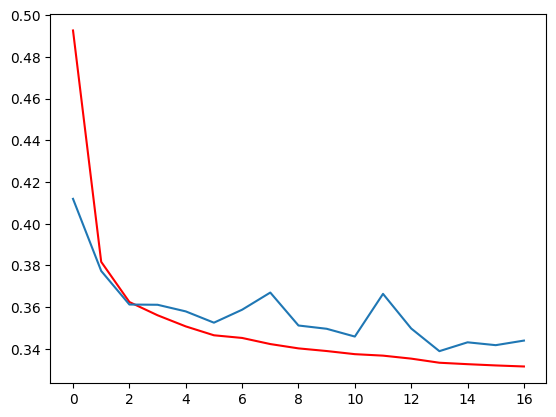

In [381]:
plt.plot(history.history['loss'],label="loss",color="red")
plt.plot(history.history['val_loss'],label="accuracy")

In [383]:
y_pred=model.predict(x_test)

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [384]:
from sklearn.metrics import r2_score

In [385]:
r2_score(y_test,y_pred)

0.6663753323279671